# Imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
# image libraries
from PIL import Image, ImageChops
import cv2
from keras.preprocessing.image import ImageDataGenerator, random_shear, random_zoom



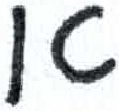

In [191]:
# this is the original image I will be using to compare against
img = Image.open("0_189.png")
width, height = img.size
img

# My Own Functions With PIL

In [196]:
def new_image(image):
    width, height = image.size
    
    # inverts the image. This is done because the background is white and the text is black
    # and editing the image with the background as black and the text as white is easier
    im = ImageChops.invert(img)
  
    
    # Rotate the image by a random angle
    angle = random.uniform(-40, 40)
    im = im.rotate(angle)

    # Stretch the image by a random factor
    x_stretch = random.uniform(0.5, 1.5)
    y_stretch = random.uniform(0.5, 1.5)
    im = im.resize((int(im.width * x_stretch), int(im.height * y_stretch)))

    # scale the image down
    scale = .8
    im = im.resize((int(im.width * scale), int(im.height * scale)))

    # crop and add so that the image is the same size as the original
    new_width, new_height = im.size

    # get the dimensions to keep the center of the image
    left = (new_width - width) // 2
    top = (new_height - height) // 2
    right = (new_width + width) // 2
    bottom = (new_height + height) // 2

    im = im.crop((left, top, right, bottom))

    return ImageChops.invert(im)


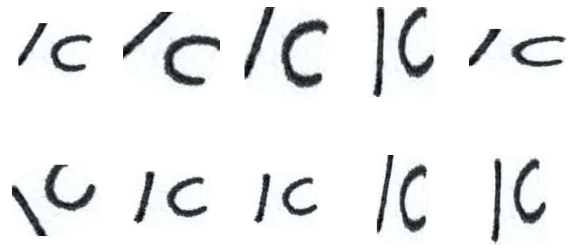

In [201]:
# use the function to create a 10 new images and plot them
import matplotlib.pyplot as plt

im = Image.open("0_189.png")
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    ax = axes[i // 5, i % 5]
    im3 = new_image(im)
    ax.imshow(im3, cmap='gray')
    ax.axis('off')

# CV2 and Affine Transformations

In [204]:
def image_affine(image, intensity = 30):
    width, height = image.size
    width, height = image.size
    
    # inverts the image. This is done because the background is white and the text is black
    # and editing the image with the background as black and the text as white is easier
    im = ImageChops.invert(img)
   
    # turn im into cv2 image in order to use cv2 functions
    im = np.array(im)
    im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
    
    # these three points represent three corners of the image (top left, top right, bottom left)
    pt1 = np.float32([[0,0],[width,0],[0,height]])
    
    # choose random points based on the intensity parameter
    pt2 = np.float32([[np.random.randint(0, intensity),np.random.randint(0, intensity)],
                      [np.random.randint(width-intensity, width),np.random.randint(0, intensity)],
                      [np.random.randint(0, intensity),np.random.randint(height-intensity, height)]])
    
    M = cv2.getAffineTransform(pt1, pt2)
    rows, cols, ch = im.shape
    dst = cv2.warpAffine(im, M, (cols, rows))

    
    
    return cv2.bitwise_not(dst)

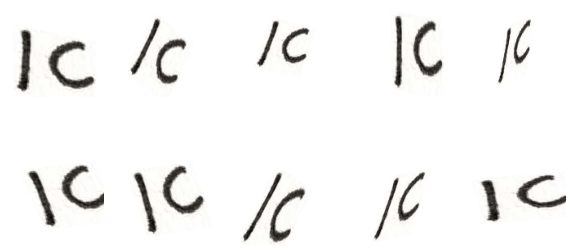

In [221]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    ax = axes[i // 5, i % 5]
    im3 = image_affine(img,50)
    ax.imshow(im3, cmap='gray')
    ax.axis('off')

# Keras Preprocessing Functions

In [215]:
def keras_image(image, shear_intensity = 50):
    img = ImageChops.invert(image)
    # expand the image
    img = img.crop((-100,-100,200,200))
    x = np.array(img)  # this is a Numpy array with shape (3, 150, 150)

    shear = random_shear(x, shear_intensity, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest', cval=0.0)
    zoom = random_zoom(shear, (0.5, 0.5), row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest', cval=0.0)
    new_img = Image.fromarray(zoom)
    new_img = new_img.resize((width,height))
    new_img = ImageChops.invert(new_img)
    return new_img

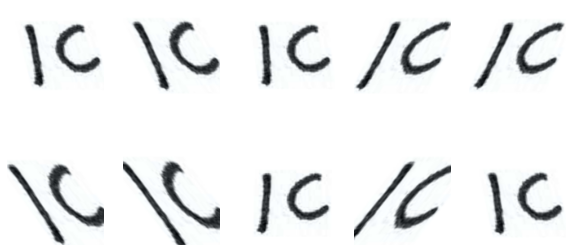

In [225]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    ax = axes[i // 5, i % 5]
    im3 = keras_image(img, 50)
    ax.imshow(im3, cmap='gray')
    ax.axis('off')

# Keras ImageDataGenerator

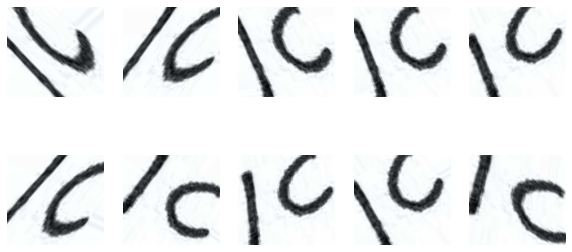

In [208]:

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.0,
        height_shift_range=0.0,
        shear_range=50,
        zoom_range=0.0,
        horizontal_flip=False,
        fill_mode='nearest')

img = Image.open('0_189.png') 
x = np.array(img)  

x = x.reshape((1,) + x.shape)

# the .flow() command below generates batches of randomly transformed images

i = 0
im_iter = datagen.flow(x, batch_size=1)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
# generate batch of images
for i in range(10):
	ax = axes[i // 5, i % 5]

	# convert to unsigned integers
	image = next(im_iter)[0].astype('uint8')
 
	# plot image
	ax.imshow(image)
	ax.axis('off')